In [1]:
import pandas as pd
import numpy as np
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

# please use the dataset bank-additional.zip and extract it
df = pd.read_csv(r"C:\0 Data Analysis\Datasets\Wholesale customers data.csv", delimiter=',')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [2]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<AxesSubplot:>

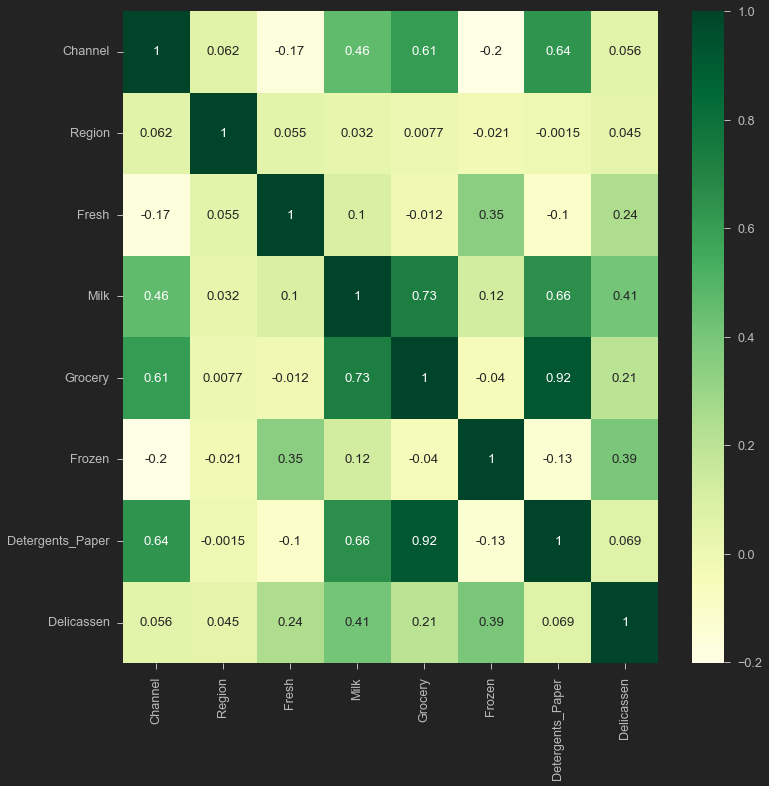

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt='.2g',cmap='YlGn')

# Declare feature vector and target variable

In [11]:
X = df.drop('Channel',axis=1)
y = df['Channel']

In [12]:
X

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [14]:
y[y == 2]=0
y[y == 1]=1
y

0      0
1      0
2      0
3      1
4      0
      ..
435    1
436    1
437    0
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2 ,random_state=123)

# XGBRegressor

In [27]:
xgb_model = XGBRegressor(verbosity = 0)

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(xgb_model, search_space, cv=10, n_iter=10, scoring='roc_auc', random_state=123,verbose=0) 
# in reality, you may consider setting cv and n_iter to higher values


In [28]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=10,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
            

# Evaluate the model and make predictions

In [29]:
opt.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             clf__colsample_bylevel=0.9293468848796316,
             clf__colsample_bynode=0.6838119318792661,
             clf__colsample_bytree=0.543734793429701,
             clf__gamma=4.6346357823454865,
             clf__learning_rate=0.07542287609378484, clf__max_depth=3,
             clf__reg_alpha=3.861568087059463,
             clf__reg_lambda=7.674910032986572,
             clf__subsample...084971486, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, ...)

In [30]:
opt.best_score_

0.9536784583702742

In [31]:
opt.score(X_test,y_test)

0.9190635451505017

In [53]:
opt.predict(X_test)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [40]:
Accuracy_Score = (opt.score(X_test,y_test)*100)
print("Accuracy Score :", Accuracy_Score)

Accuracy Score : 91.90635451505017


# XGBClassifier

In [54]:
xgb_model1 = XGBClassifier(verbosity = 0,objective = 'binary:logistic')

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(xgb_model1, search_space, cv=10, n_iter=20, scoring='roc_auc', random_state=123,verbose=0) 
# in reality, you may consider setting cv and n_iter to higher values


In [55]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=10,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, gamma=None, gpu_id=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_bin=None,
                                      max_...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
  

# Evaluate the model and make predictions

In [56]:
opt.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              clf__colsample_bylevel=0.9293468848796316,
              clf__colsample_bynode=0.6838119318792661,
              clf__colsample_bytree=0.543734793429701,
              clf__gamma=4.6346357823454865,
              clf__learning_rate=0.07542287609378484, clf__max_depth=3,
              clf__reg_alpha=3.861568087059463,
              clf__reg_lambda=7.674910032986572,
              clf__subsampl...084971486, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1, ...)

In [57]:
opt.best_score_

0.9478631422924902

In [58]:
opt.score(X_test,y_test)

0.9217391304347827

In [59]:
opt.predict(X_test)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [60]:
Accuracy_Score = (opt.score(X_test,y_test)*100)
print("Accuracy Score :", Accuracy_Score)

Accuracy Score : 92.17391304347828


# Cross Validation

In [61]:
import xgboost as xgb
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [62]:
from xgboost import cv

params = {"objective":"binary:logistic",
          'base_score':0.5, 
          'booster':'gbtree', 
          'callbacks':None,
              'clf__colsample_bylevel':0.9293468848796316,
              'clf__colsample_bynode':0.6838119318792661,
              'clf__colsample_bytree':0.543734793429701,
              'clf__gamma':4.6346357823454865,
              'clf__learning_rate':0.07542287609378484, 
               'clf__max_depth':3,
              'clf__reg_alpha':3.861568087059463,
              'clf__reg_lambda':7.674910032986572,
              'colsample_bylevel':1,
              'colsample_bynode':1, 'colsample_bytree':1,
              'early_stopping_rounds':None, 'enable_categorical':False,
              'eval_metric':None, 'gamma':0, 'gpu_id':-1, 'grow_policy':'depthwise',
              'importance_type':None, 'interaction_constraints':'',
              'learning_rate':0.300000012, 'max_bin':256, 'max_cat_to_onehot':4,
              'max_delta_step':0, 'max_depth':6, 'max_leaves':0, 'min_child_weight':1}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [63]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.967666,0.005586,0.943802,0.019811
1,0.978314,0.007046,0.944899,0.023138
2,0.987138,0.005939,0.948013,0.026929
3,0.993010,0.002058,0.952813,0.022834


# Find out feature importance with best estimator parameter

In [69]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {"objective":"binary:logistic",
          'base_score':0.5, 
          'booster':'gbtree', 
          'callbacks':None,
              'clf__colsample_bylevel':0.9293468848796316,
              'clf__colsample_bynode':0.6838119318792661,
              'clf__colsample_bytree':0.543734793429701,
              'clf__gamma':4.6346357823454865,
              'clf__learning_rate':0.07542287609378484, 
               'clf__max_depth':3,
              'clf__reg_alpha':3.861568087059463,
              'clf__reg_lambda':7.674910032986572,
              'colsample_bylevel':1,
              'colsample_bynode':1, 'colsample_bytree':1,
              'early_stopping_rounds':None, 'enable_categorical':False,
              'eval_metric':None, 'gamma':0, 'gpu_id':-1, 'grow_policy':'depthwise',
              'importance_type':None, 'interaction_constraints':'',
              'learning_rate':0.300000012, 'max_bin':256, 'max_cat_to_onehot':4,
              'max_delta_step':0, 'max_depth':6, 'max_leaves':0, 'min_child_weight':1}
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              clf__colsample_bylevel=0.9293468848796316,
              clf__colsample_bynode=0.6838119318792661,
              clf__colsample_bytree=0.543734793429701,
              clf__gamma=4.6346357823454865,
              clf__learning_rate=0.07542287609378484, clf__max_depth=3,
              clf__reg_alpha=3.861568087059463,
              clf__reg_lambda=7.674910032986572, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, ...)

In [70]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

In [74]:
# check accuracy score
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

XGBoost model accuracy score: 92.0455


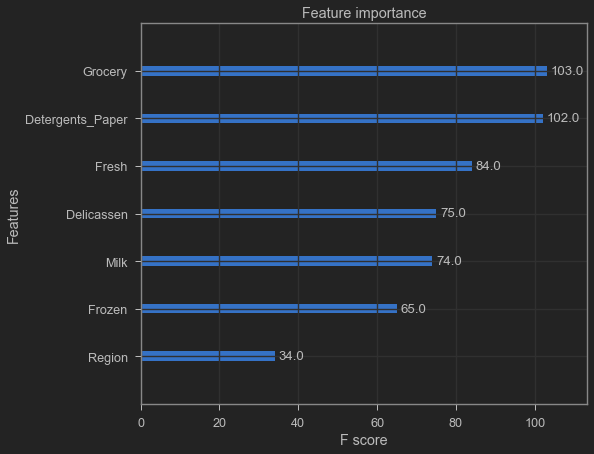

In [72]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

# RESULT & CONCLUSION

### 1.In this project,implementation of XGBoost with Python and Scikit-Learn to classify the customers from two different channels as 
### Horeca (Hotel/Retail/Café) customers or Retail channel (nominal) customers.

### 2.Trained dataset with the XGBoost classifier and XGBoost regressor found the accuracy score to be 92.17% and 91.91% respectively

### 3.perform the hyperparameter tuning in XGBoost by doing k-fold cross-validation.

### 4.Find the most important feature in XGBoost to be Grocey(score = 103) using the plot_importance() function in XGBoost best parameter tuning that helps us to achieve this task.